In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

import numpy as np

In [2]:
date, bid, ask = np.loadtxt('GBPUSD1d.txt', unpack = 'True', delimiter = ',', 
                            converters = {0:mdates.strpdate2num('%Y%m%d%H%M%S')})

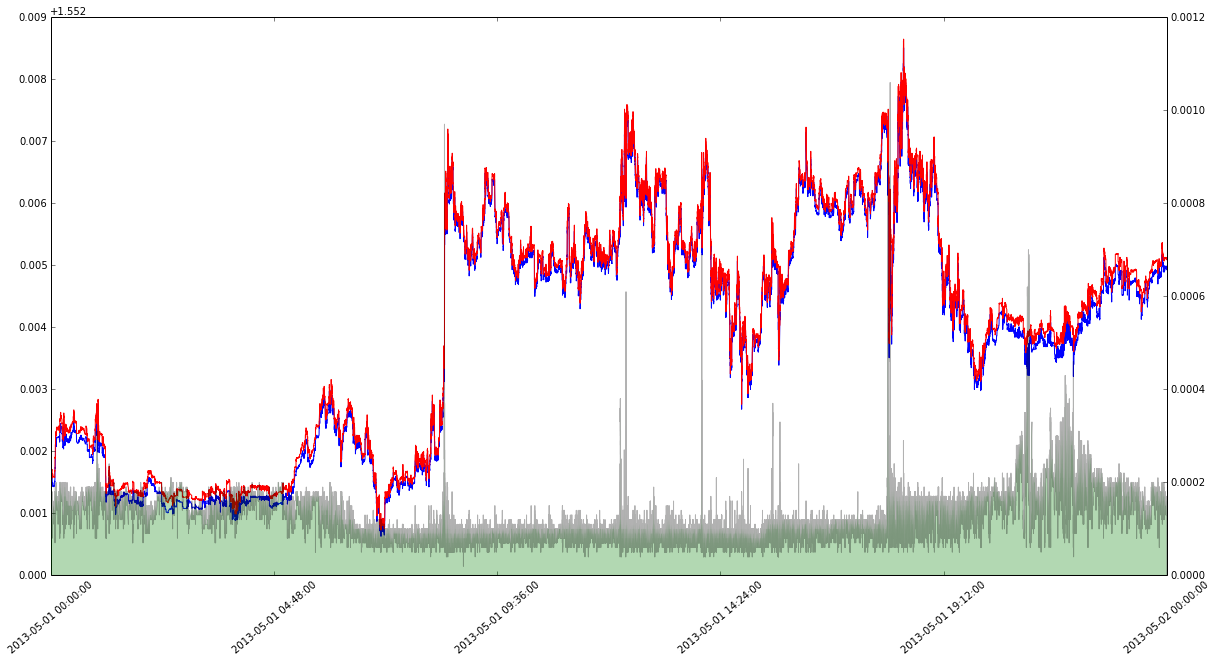

In [3]:
fig, ba = plt.subplots(figsize=(20,10))
ba.plot(date, bid, 'b')
ba.plot(date, ask, 'r')
ba.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
for label in ba.xaxis.get_ticklabels():
    label.set_rotation(40)
    
gap = ba.twinx()
gap.fill_between(date, 0, (ask - bid), facecolor='g', alpha=.3)


In [36]:
def pChange(s, c):
    return ((c - s)*100.00)/s

In [56]:
def genPattern():
    avgLine = ((bid+ask)/2)
    x = len(avgLine) - 30
    
    patterns = []
    scores = []
    for y in xrange(11, 12):
        patterns.append( [ pChange(avgLine[y - 10], avgLine[y - z]) for z in xrange(10) ] )
       
        avgOutCome = reduce(lambda x, y: x+y, avgLine[y+20:y+30])/ 10
        scores.append( pChange(avgLine[y - 11], avgOutCome) )
    return patterns, scores

In [57]:
patterns, scores = genPattern()

In [58]:
patterns[5]

IndexError: list index out of range

In [51]:
scores[5]

-0.0015126402008384635